<a href="https://colab.research.google.com/github/eea2003/DSA210-PROJECT/blob/main/listening_data_visualizedand_merged_with_smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         date     artistName  daily_listening_count
0  2024-10-04     King Krule                      1
1  2024-10-04     Wax Poetic                      2
2  2024-10-04  Kylie Minogue                      1
3  2024-10-04       Moriarty                      2
4  2024-10-04   Bronski Beat                      1


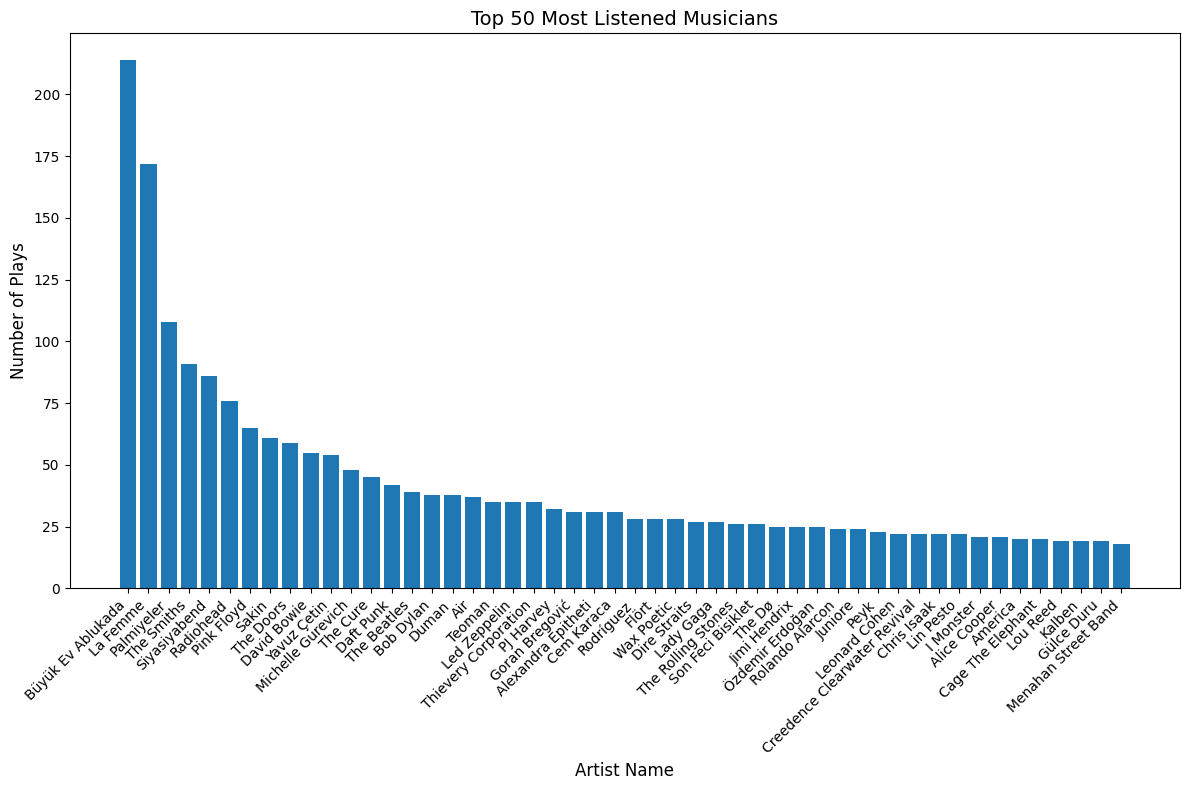

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Daily_Listening_Counts.csv'
data = pd.read_csv(file_path)

print(data.head())


musician_data = data.groupby('artistName')['daily_listening_count'].sum().reset_index()

musician_data = musician_data.sort_values(by='daily_listening_count', ascending=False)

# Select the top 50 most listened musicians
top_50_musicians = musician_data.head(50)

# Plot the histogram
plt.figure(figsize=(12, 8))
plt.bar(top_50_musicians['artistName'], top_50_musicians['daily_listening_count'])
plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Number of Plays', fontsize=12)
plt.title('Top 50 Most Listened Musicians', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

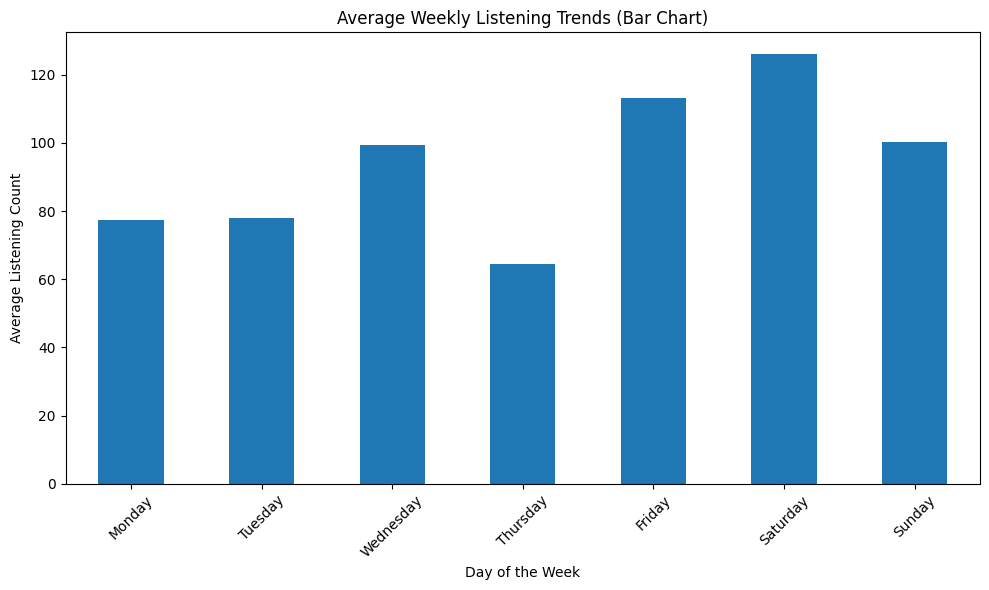

day_of_week
Monday        77.250000
Tuesday       78.000000
Wednesday     99.375000
Thursday      64.625000
Friday       113.222222
Saturday     126.111111
Sunday       100.375000
Name: daily_listening_count, dtype: float64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with the correct delimiter and split column names
listening_data = pd.read_csv('Daily_Listening_Counts.csv', delimiter=',')
listening_data.columns = [col.strip() for col in listening_data.columns]  # Strip extra spaces

# Convert the 'date' column to datetime format
listening_data['date'] = pd.to_datetime(listening_data['date'])

# Aggregate listening counts by date
daily_listening_trends = listening_data.groupby('date')['daily_listening_count'].sum().reset_index()

# Add a column for day of the week
daily_listening_trends['day_of_week'] = daily_listening_trends['date'].dt.day_name()

# Aggregate by day of the week to find weekly trends
weekly_listening_trends = daily_listening_trends.groupby('day_of_week')['daily_listening_count'].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Plot a bar chart (histogram) of weekly listening trends
plt.figure(figsize=(10, 6))
weekly_listening_trends.plot(kind='bar', rot=45)
plt.title('Average Weekly Listening Trends (Bar Chart)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Listening Count')
plt.tight_layout()
plt.show()


# Display the weekly listening trends
print(weekly_listening_trends)

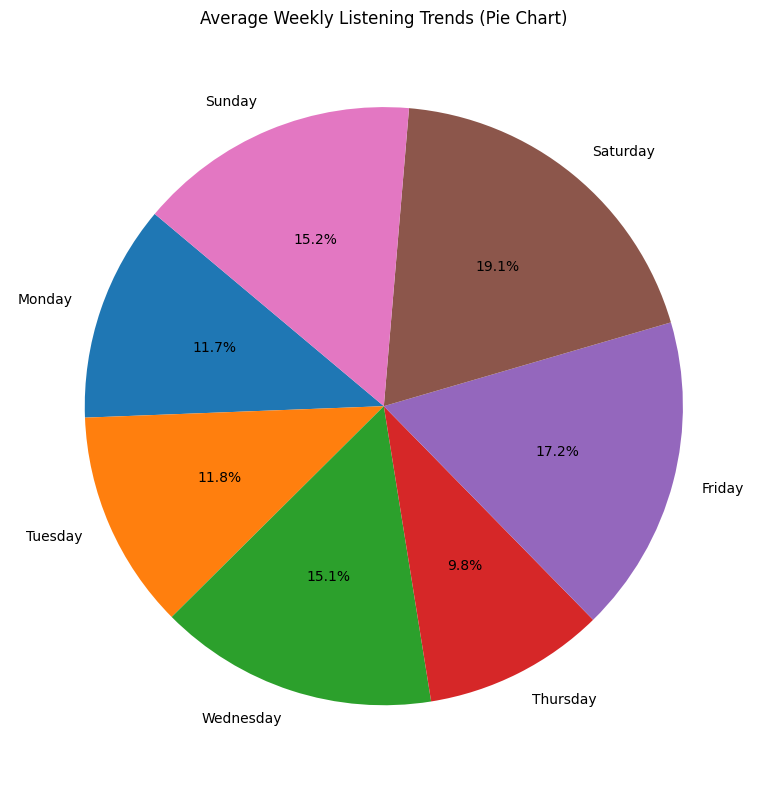

In [19]:
# Plot a pie chart of weekly listening trends
plt.figure(figsize=(8, 8))
weekly_listening_trends.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Average Weekly Listening Trends (Pie Chart)')
plt.ylabel('')
plt.tight_layout()
plt.show()


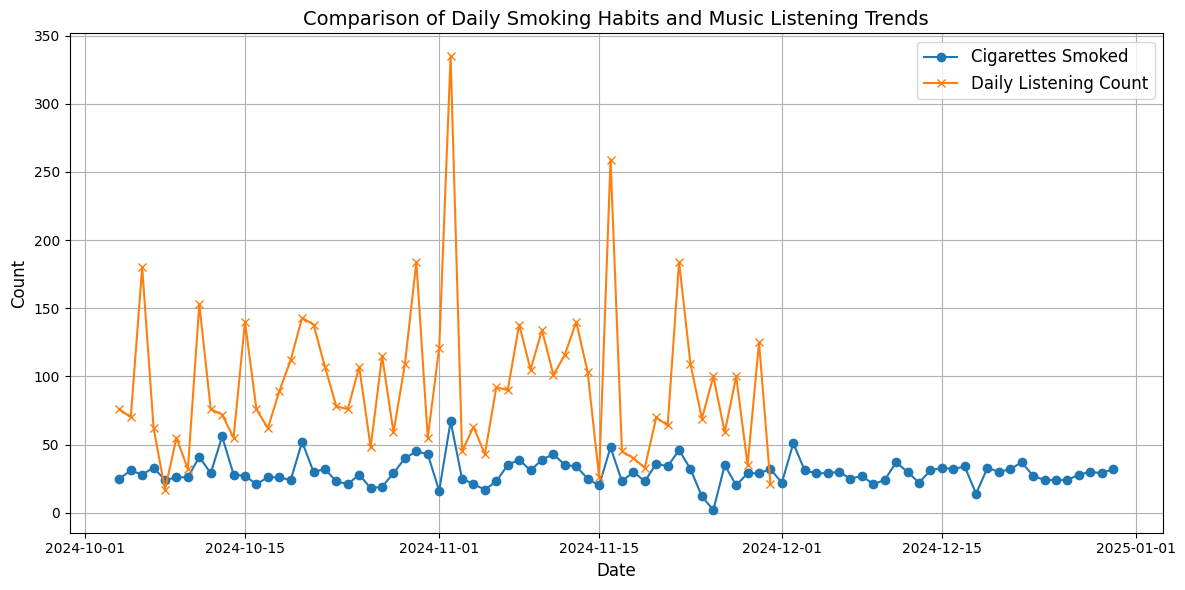

Pearson Correlation Coefficient: 0.57
P-value: 3.75e-06
The correlation is statistically significant.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'Merged_Smoking_and_Listening_Data.csv'
merged_data = pd.read_csv(file_path)


merged_data['Date'] = pd.to_datetime(merged_data['Date'], errors='coerce')


plt.figure(figsize=(12, 6))

plt.plot(merged_data['Date'], merged_data['Cigarettes_Smoked'], label='Cigarettes Smoked', marker='o')
plt.plot(merged_data['Date'], merged_data['Daily_Listening_Count'], label='Daily Listening Count', marker='x')

plt.title('Comparison of Daily Smoking Habits and Music Listening Trends', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()


from scipy.stats import pearsonr
data = merged_data[['Cigarettes_Smoked', 'Daily_Listening_Count']].dropna()


correlation, p_value = pearsonr(data['Cigarettes_Smoked'], data['Daily_Listening_Count'])

# Print the results
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

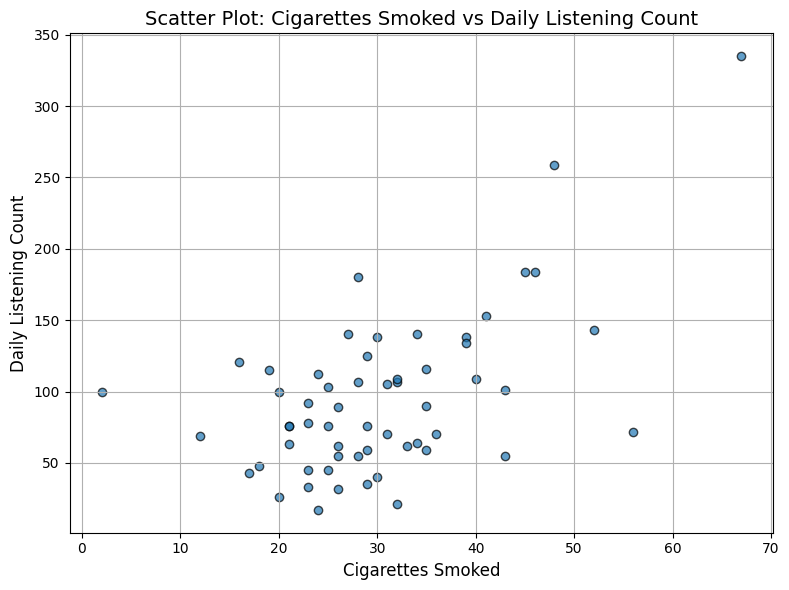

Pearson Correlation Coefficient: 0.57
P-value: 3.75e-06
The correlation is statistically significant.


In [8]:

file_path = 'Merged_Smoking_and_Listening_Data.csv'
merged_data = pd.read_csv(file_path)

merged_data['Date'] = pd.to_datetime(merged_data['Date'], errors='coerce')


plt.figure(figsize=(8, 6))


plt.scatter(
    merged_data['Cigarettes_Smoked'],
    merged_data['Daily_Listening_Count'],
    alpha=0.7,
    edgecolor='k'
)

#  title
plt.title('Scatter Plot: Cigarettes Smoked vs Daily Listening Count', fontsize=14)
plt.xlabel('Cigarettes Smoked', fontsize=12)
plt.ylabel('Daily Listening Count', fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()

from scipy.stats import pearsonr

data = merged_data[['Cigarettes_Smoked', 'Daily_Listening_Count']].dropna()

correlation, p_value = pearsonr(data['Cigarettes_Smoked'], data['Daily_Listening_Count'])


print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")


if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

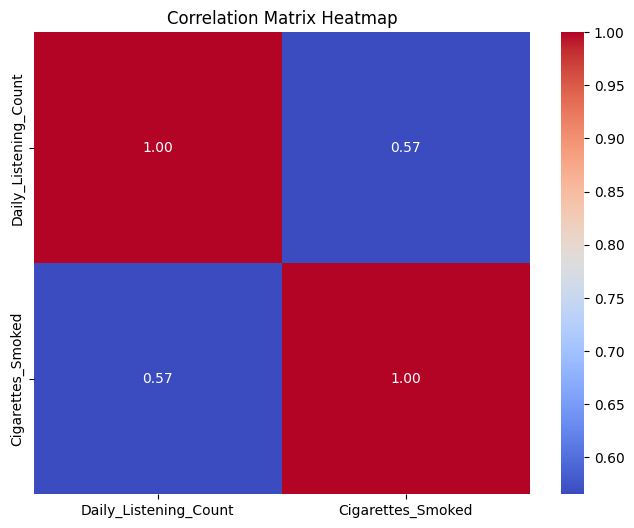

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_data = merged_data.loc[:, ~merged_data.columns.str.contains('^Unnamed')]

numeric_data = merged_data.select_dtypes(include=['float64', 'int64']).dropna()


correlation_matrix = numeric_data.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

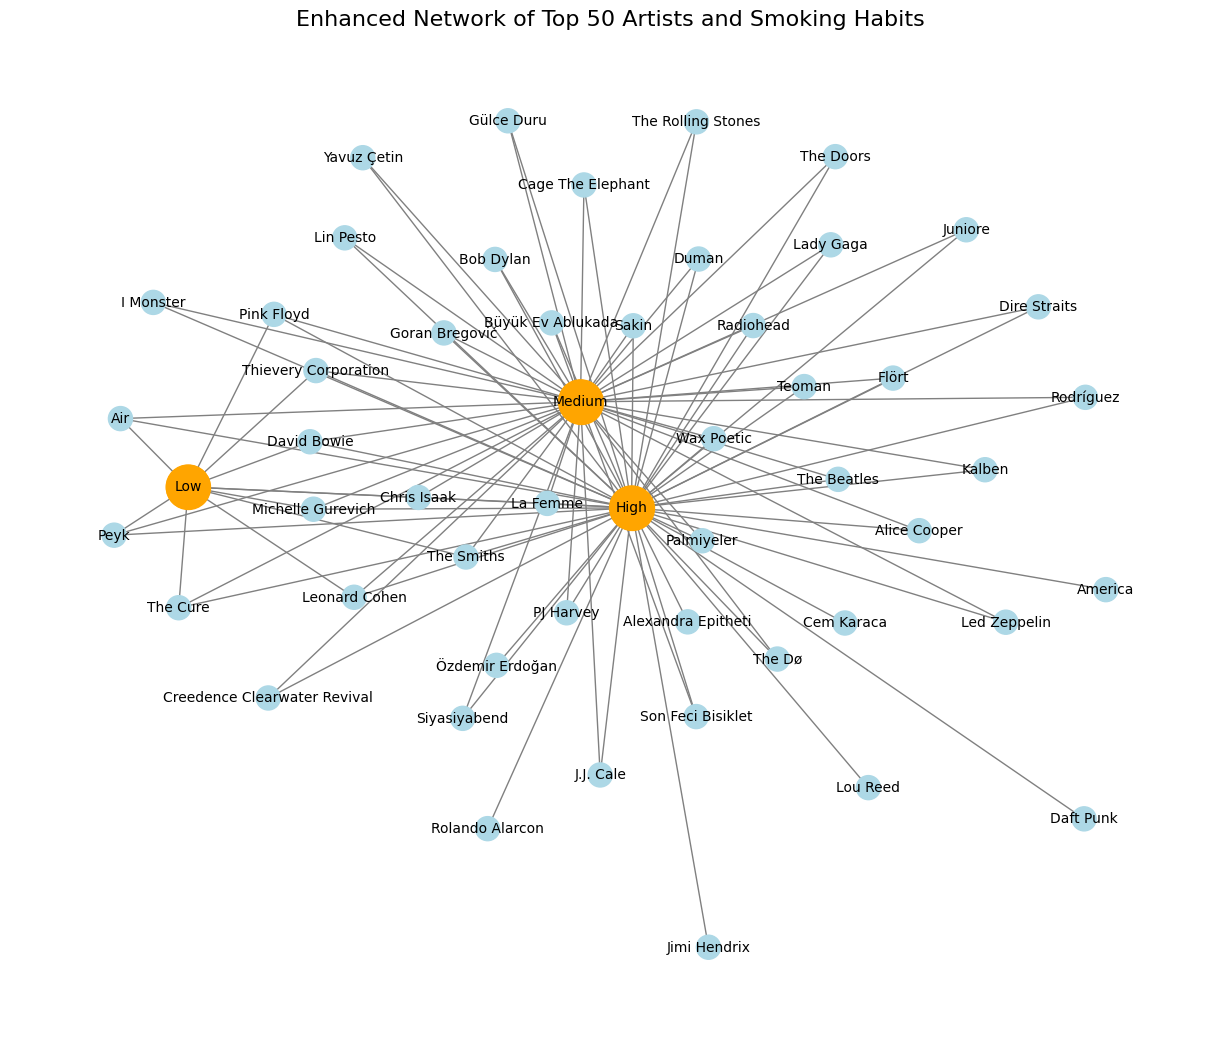


Observations:
    • Central Smoking Levels:
        - The Medium and High smoking levels are highly connected, indicating many of the top artists are associated with these habits.
        - The Low smoking level has fewer connections, suggesting fewer artists are associated with lower smoking habits.
    • Diverse Artist Connections:
        - Artists like Radiohead, Bob Dylan, and David Bowie are prominently linked to Medium smoking habits.
        - High smoking habits have a broader range of connections, including artists such as Pink Floyd, Jimi Hendrix, and The Rolling Stones, which could reflect a shared cultural association.
    • Focused Connections for Low Smoking Levels:
        - Low smoking habits are associated with fewer artists, such as Peyk and Air, indicating a niche listening audience or habit correlation.

Insights:
    • Potential Cultural Trends:
        - The clustering around certain smoking levels (e.g., High) suggests cultural or behavioral trends that link li

In [22]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

listening_data_path = 'Daily_Listening_Counts.csv'
smoking_data_path = 'Merged_Smoking_and_Listening_Data.csv'

listening_data = pd.read_csv(listening_data_path, sep=';', on_bad_lines='skip')
smoking_data = pd.read_csv(smoking_data_path, on_bad_lines='skip')


smoking_data.rename(columns={'Date': 'date'}, inplace=True)


data = pd.merge(listening_data, smoking_data, on='date', how='inner')

top_artists = (
    data.groupby('artistName')['daily_listening_count']
    .sum()
    .nlargest(50)
    .index
)

data = data[data['artistName'].isin(top_artists)]


G = nx.Graph()

for artist in data['artistName'].unique():
    G.add_node(artist, type='artist', size=300, color='lightblue')

smoking_categories = ['Low', 'Medium', 'High']
for category in smoking_categories:
    G.add_node(category, type='smoking', size=1000, color='orange')

for _, row in data.iterrows():
    smoking_level = (
        'Low' if row['Cigarettes_Smoked'] < 10 else
        'Medium' if row['Cigarettes_Smoked'] < 20 else
        'High'
    )
    G.add_edge(row['artistName'], smoking_level, weight=row['daily_listening_count'])

node_sizes = [nx.get_node_attributes(G, 'size')[node] for node in G.nodes()]
node_colors = [nx.get_node_attributes(G, 'color')[node] for node in G.nodes()]


plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, edge_color="gray",
    font_size=10, font_color="black"
)

nx.draw_networkx_nodes(G, pos, nodelist=smoking_categories, node_size=1000, node_color='orange')


plt.title('Enhanced Network of Top 50 Artists and Smoking Habits', fontsize=16)
plt.show()



